# Deep Neural Networks 
## Group Assignment 02


##  Convolutional Neural Network (CNN)
- Flowers Dataset
- Dataset Directory

TensorFlow Datasets: tf_flowers (https://www.tensorflow.org/datasets/catalog/tf_flowers)




In [1]:
### Import Libraries

import tensorflow as tf

import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf

In [2]:
#Check for GPU available in local system
physical_devices = tf.config.list_physical_devices('GPU') 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    
%matplotlib inline

Num GPUs Available:  1


In [3]:
# Some basic parameters

inpDir = 'input' # location where input data is stored
outDir = 'output' # location to store outputs
subDir = 'flower_photos'


RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
tf.random.set_seed(RANDOM_STATE)

EPOCHS = 60 # number of cycles to run

BATCH_SIZE = 16 # inline of Traing Rows being 60000

TEST_SIZE = 0.2

IMG_HEIGHT = 188

IMG_WIDTH = 188

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,10),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

CMAP = plt.cm.brg

plt.rcParams.update(params) # update rcParams

## Helper Function

In [4]:
def fn_plot_hist(hist_df):
    
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)

    ax = axes[0]

    hist_df.plot(y = [hist_df.columns[0],hist_df.columns[2]], ax = ax, colormap=CMAP)

    lossmin = hist_df[hist_df.columns[0]].min()

    testmin = hist_df[hist_df.columns[2]].min()

    # little beautification
    txtstr = "Min {}: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(hist_df.columns[0],
                                                                          lossmin,
                                                                          testmin) #text to plot

    # place a text box in upper left in axes coords

    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    ax.set_xlabel("Epochs")

    ax.set_ylabel(hist_df.columns[0].capitalize())

    ax.grid();

    ax = axes[1]

    hist_df.plot( y = [hist_df.columns[1], hist_df.columns[3]], ax = ax, colormap=CMAP)

    # little beautification
    accmin = hist_df[hist_df.columns[1]].max()
    testmin = hist_df[hist_df.columns[3]].max()
    txtstr = "Max {}: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(hist_df.columns[1],
                                                                                accmin,
                                                                                testmin) #text to plot

    # place a text box in upper left in axes coords

    ax.text(0.4, 0.5, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(hist_df.columns[1].capitalize())
    ax.grid();
    plt.tight_layout()

In [5]:
def fn_plot_label(tr_ds, ts_ds):
    
    plt.figure(figsize = (15,5))
    
    plt.subplot(1,2,1)

    train_labels = tf.concat([y for x, y in tr_ds], axis = 0).numpy()
    
    unique, _, counts = tf.unique_with_counts(train_labels)
    
    plt.bar(range(len(unique)), counts, align='center',color = 'DarkBlue', alpha = 0.7)
    
    plt.title('Training Set')
    
    plt.xticks(range(len(unique)), class_names);
    plt.grid()


    plt.subplot(1,2,2)

    val_labels = tf.concat([y for x, y in ts_ds], axis = 0).numpy()
    
    unique, _, counts = tf.unique_with_counts(val_labels)
    
    plt.bar(range(len(unique)), counts, align='center', color = 'Orange', alpha = 0.7)
    
    plt.title('Test Set')
    
    plt.xticks(range(len(unique)), class_names)
    
    plt.grid()
    
    plt.show()

## Using Flowers Dataset

In [6]:
### For colab users

import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [7]:
## For loading dataset from local storage

#data_dir = os.path.join(inpDir,subDir)
#C:\Users\Devashish\Downloads\flower_photos\flower_photos\flower_photos
#data_dir = os.path.join(C:\Users\Devashish\Downloads\flower_photos\flower_photos\flower_photos)


#data_dir = os.path.join(inpDir,subDir)

In [8]:
# load data and split in training and validation from a sub dir

# training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=TEST_SIZE,
    subset="training",
    seed=RANDOM_STATE,
    
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

# testing dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=TEST_SIZE,
    subset="validation",
    seed=RANDOM_STATE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names

print('Total: {:3d} Classes; namely : {:s}'.format(len(class_names), str(class_names)))

Total:   5 Classes; namely : ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


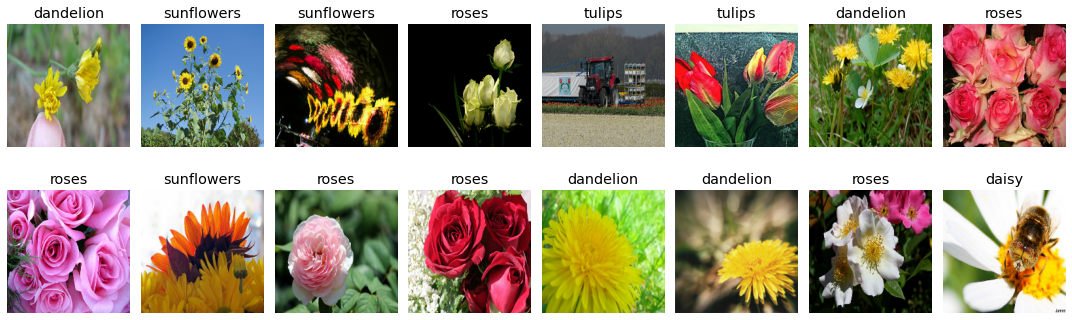

In [10]:
plt.figure(figsize=(15,5))

for images, labels in train_ds.take(1): # gets a batch of first BATCH_SIZE images
    
    for i in range(BATCH_SIZE):
        
        plt.subplot(2,int(BATCH_SIZE/2),i+1)
        
        plt.grid(False)
        
        plt.imshow(images[i].numpy().astype("uint8")) # image_size has converted these images to float
        
        plt.title(class_names[labels[i]])
        
        plt.axis("off")
    
    plt.tight_layout()
    
    plt.show()

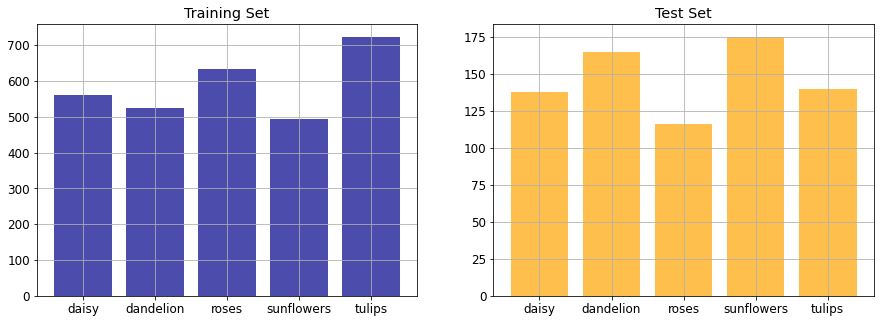

In [11]:
fn_plot_label(train_ds, test_ds)


In [12]:
## Optimize for performance
#loading data into cache for faster execution
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMG_HEIGHT,
                                  IMG_WIDTH,
                                  3)),
    tf.keras.layers.RandomRotation((-0.1,0.1)),
    tf.keras.layers.RandomZoom(-0.1,0.1),
  ]
)

In [14]:
#keras.initializers
krnl_init = tf.keras.initializers.GlorotUniform( seed = RANDOM_STATE)

model = tf.keras.models.Sequential()
model.add(data_augmentation)

model.add(tf.keras.layers.Rescaling(1./255),)

# Convolution 1
model.add(tf.keras.layers.Conv2D(32, (5, 5),
                                 kernel_initializer = krnl_init,
                                 padding='same', 
                                 input_shape=(IMG_HEIGHT , IMG_WIDTH, 3),
                                 use_bias = False)) # Notice change in Bias
# Batch Norm Layer1
model.add(tf.keras.layers.BatchNormalization())


# Activation Layer1
model.add(tf.keras.layers.Activation('relu'))

# Pool 1
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

# Convolution 2
model.add(tf.keras.layers.Conv2D(64, (5, 5),
                                 kernel_initializer = krnl_init,
                                 use_bias = False))

# Batch Norm Layer2
model.add(tf.keras.layers.BatchNormalization())

# Activation Layer2
model.add(tf.keras.layers.Activation('relu'))


# Pool 2
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

# Convolution 3
model.add(tf.keras.layers.Conv2D(128, (5, 5),
                                 kernel_initializer = krnl_init,
                                 use_bias = False) )
          
# Batch Norm Layer3
model.add(tf.keras.layers.BatchNormalization())

# Activation Layer3
model.add(tf.keras.layers.Activation('relu'))

# Pool 3
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

# Convolution 4
model.add(tf.keras.layers.Conv2D(256, (3, 3),
                                 kernel_initializer = krnl_init,
                                 use_bias = False) )
          
# Batch Norm Layer4
model.add(tf.keras.layers.BatchNormalization())

# Activation Layer4
model.add(tf.keras.layers.Activation('relu'))

# Pool 4
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))


In [15]:
model.add(tf.keras.layers.Flatten())

# Dense 1
model.add(tf.keras.layers.Dense(1024,
                                kernel_initializer = krnl_init,
                                use_bias = False))
# Batch Norm Layer4
model.add(tf.keras.layers.BatchNormalization())

# Activation Layer4
model.add(tf.keras.layers.Activation('relu'))

# Dropout
model.add(tf.keras.layers.Dropout(0.5))

# Dense 2
model.add(tf.keras.layers.Dense(5))

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              
              metrics=['accuracy'])


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=5, min_lr=0.001)

history = model.fit(train_ds,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=test_ds, callbacks=[reduce_lr])




Epoch 1/60
184/184 [==============================] - 23s 83ms/step - loss: 2.3469 - accuracy: 0.3750 - val_loss: 2.1622 - val_accuracy: 0.4114 - lr: 0.0100
Epoch 2/60
184/184 [==============================] - 13s 70ms/step - loss: 1.7758 - accuracy: 0.4448 - val_loss: 1.6882 - val_accuracy: 0.4251 - lr: 0.0100
Epoch 3/60
184/184 [==============================] - 13s 69ms/step - loss: 1.3520 - accuracy: 0.4952 - val_loss: 1.1771 - val_accuracy: 0.5586 - lr: 0.0100
Epoch 4/60
184/184 [==============================] - 13s 69ms/step - loss: 1.1957 - accuracy: 0.5371 - val_loss: 1.2824 - val_accuracy: 0.5245 - lr: 0.0100
Epoch 5/60
184/184 [==============================] - 13s 69ms/step - loss: 1.0869 - accuracy: 0.5780 - val_loss: 1.0962 - val_accuracy: 0.5627 - lr: 0.0100
Epoch 6/60
184/184 [==============================] - 13s 69ms/step - loss: 1.0300 - accuracy: 0.6012 - val_loss: 1.0813 - val_accuracy: 0.5981 - lr: 0.0100
Epoch 7/60
184/184 [==============================] - 13s 

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 188, 188, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 188, 188, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 188, 188, 32)      2400      
                                                                 
 batch_normalization (BatchN  (None, 188, 188, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 188, 188, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 94, 94, 32)       0         
 )                                                    

In [18]:
res_df = pd.DataFrame(history.history)
res_df

,loss,accuracy,val_loss,val_accuracy,lr
0,2.346868,0.375000,2.162159,0.411444,0.010000
1,1.775838,0.444823,1.688160,0.425068,0.010000
2,1.351972,0.495232,1.177093,0.558583,0.010000
3,1.195702,0.537125,1.282412,0.524523,0.010000
4,1.086910,0.577997,1.096158,0.562670,0.010000
5,1.029983,0.601158,1.081349,0.598093,0.010000
6,0.973559,0.623297,1.001895,0.614441,0.010000
7,0.932073,0.629428,1.061559,0.588556,0.010000
8,0.916221,0.646458,0.900040,0.670300,0.010000
9,0.883415,0.653951,0.994609,0.645777,0.010000


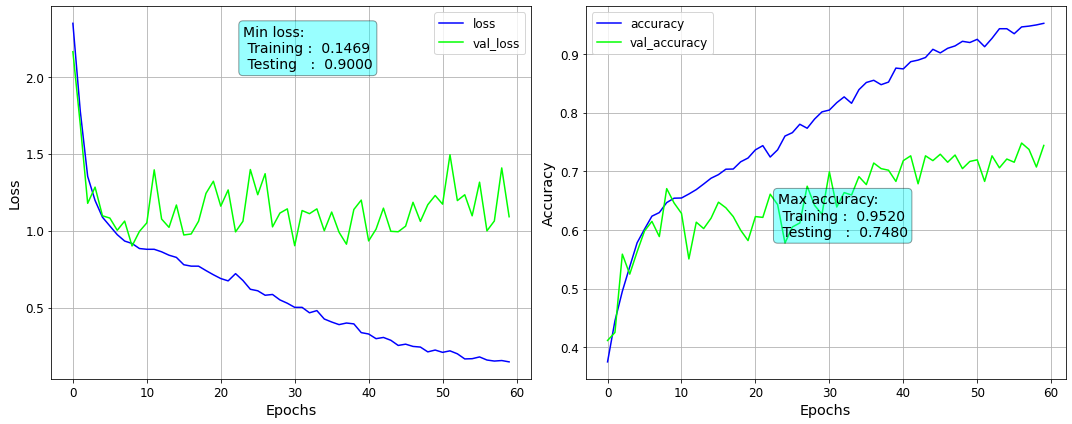

In [19]:
fn_plot_hist(res_df)

In [20]:
model.save(r'C:\Users\Devashish\Downloads/DNN_CNN_flowerModel.h5')